# EQUITY ONE-TOUCH OPTION

Analysis of equity options that trigger a payment (or non-payment) if a barrier is crossed at ANY time before expiry.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import OptionTypes
from financepy.models.black_scholes import BlackScholes


In [3]:
from financepy.market.curves.discount_curve_flat import DiscountCurveFlat


In [4]:
from financepy.products.equity.equity_one_touch_option import *

## Types of One Touch Option

In [5]:
for type in TouchOptionTypes:
    print(type)

TouchOptionTypes.DOWN_AND_IN_CASH_AT_HIT
TouchOptionTypes.UP_AND_IN_CASH_AT_HIT
TouchOptionTypes.DOWN_AND_IN_CASH_AT_EXPIRY
TouchOptionTypes.UP_AND_IN_CASH_AT_EXPIRY
TouchOptionTypes.DOWN_AND_OUT_CASH_OR_NOTHING
TouchOptionTypes.UP_AND_OUT_CASH_OR_NOTHING
TouchOptionTypes.DOWN_AND_IN_ASSET_AT_HIT
TouchOptionTypes.UP_AND_IN_ASSET_AT_HIT
TouchOptionTypes.DOWN_AND_IN_ASSET_AT_EXPIRY
TouchOptionTypes.UP_AND_IN_ASSET_AT_EXPIRY
TouchOptionTypes.DOWN_AND_OUT_ASSET_OR_NOTHING
TouchOptionTypes.UP_AND_OUT_ASSET_OR_NOTHING


## Valuation Parameters

In [6]:
value_dt = Date(1, 1, 2016)
expiry_dt = Date(2, 7, 2016)
interest_rate = 0.10
discount_curve = DiscountCurveFlat(value_dt, interest_rate)
volatility = 0.20
barrier_level = 100.0
model = BlackScholes(volatility)
dividend_yield = 0.02

In [7]:
dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)

# Cash Payoff One Touch Options

We consider cash payout options which trigger by the stock price falling.

In [8]:
stock_price = 105.0
payment_size = 15.0

In [9]:
downTypes = [TouchOptionTypes.DOWN_AND_IN_CASH_AT_HIT,
             TouchOptionTypes.DOWN_AND_IN_CASH_AT_EXPIRY,
             TouchOptionTypes.DOWN_AND_OUT_CASH_OR_NOTHING]

In [10]:
print("%60s %12s %12s" % ("Option Type", "Analytical", "Monte Carlo"))
for downType in downTypes:
    option = EquityOneTouchOption(expiry_dt,downType,barrier_level,payment_size)
    v = option.value(value_dt,stock_price,discount_curve,dividend_curve,model)
    v_mc = option.value_mc(value_dt,stock_price,discount_curve,dividend_curve,model)
    print("%60s %12.5f %12.5f" % (downType, v, v_mc))

                                                 Option Type   Analytical  Monte Carlo
                    TouchOptionTypes.DOWN_AND_IN_CASH_AT_HIT     10.01509      9.36049
                 TouchOptionTypes.DOWN_AND_IN_CASH_AT_EXPIRY      9.63850      9.02194
               TouchOptionTypes.DOWN_AND_OUT_CASH_OR_NOTHING      4.62994      5.24651


In [11]:
stock_price = 95.0
payment_size = 15.0

In [12]:
upTypes = [TouchOptionTypes.UP_AND_IN_CASH_AT_HIT,
           TouchOptionTypes.UP_AND_IN_CASH_AT_EXPIRY,
           TouchOptionTypes.UP_AND_OUT_CASH_OR_NOTHING]

In [13]:
print("%60s %12s %12s" % ("Option Type", "Analytical", "Monte Carlo"))
for upType in upTypes:
    option = EquityOneTouchOption(expiry_dt,upType,barrier_level,payment_size)
    v = option.value(value_dt,stock_price,discount_curve,dividend_curve,model)
    v_mc = option.value_mc(value_dt,stock_price,discount_curve,dividend_curve,model)
    print("%60s %12.5f %12.5f" % (downType, v, v_mc))

                                                 Option Type   Analytical  Monte Carlo
               TouchOptionTypes.DOWN_AND_OUT_CASH_OR_NOTHING     11.41159     10.88927
               TouchOptionTypes.DOWN_AND_OUT_CASH_OR_NOTHING     10.98807     10.50157
               TouchOptionTypes.DOWN_AND_OUT_CASH_OR_NOTHING      3.28037      3.76687


## Asset Payoff One Touch Options

In [14]:
downTypes = [TouchOptionTypes.DOWN_AND_IN_ASSET_AT_HIT,
             TouchOptionTypes.DOWN_AND_IN_ASSET_AT_EXPIRY,
             TouchOptionTypes.DOWN_AND_OUT_ASSET_OR_NOTHING]

In [15]:
stock_price = 105.0

In [16]:
for downType in downTypes:
    option = EquityOneTouchOption(expiry_dt, downType, barrier_level)
    v = option.value(value_dt, stock_price, discount_curve, dividend_curve, model)
    v_mc = option.value_mc(value_dt, stock_price, discount_curve, dividend_curve, model)
    print("%60s %9.5f %9.5f" % (downType, v, v_mc))

                   TouchOptionTypes.DOWN_AND_IN_ASSET_AT_HIT  66.76729  62.40324
                TouchOptionTypes.DOWN_AND_IN_ASSET_AT_EXPIRY  66.25674  63.23000
              TouchOptionTypes.DOWN_AND_OUT_ASSET_OR_NOTHING  37.69849  42.48498


In [17]:
stock_price = 95.0

In [18]:
upTypes = [TouchOptionTypes.UP_AND_IN_ASSET_AT_HIT,
           TouchOptionTypes.UP_AND_IN_ASSET_AT_EXPIRY,
           TouchOptionTypes.UP_AND_OUT_ASSET_OR_NOTHING]

In [19]:
for upType in upTypes:
    option = EquityOneTouchOption(expiry_dt, upType, barrier_level)
    v = option.value(value_dt, stock_price, discount_curve, dividend_curve, model)
    v_mc = option.value_mc(value_dt, stock_price, discount_curve, dividend_curve, model)
    print("%60s %9.5f %9.5f" % (upType, v, v_mc))

                     TouchOptionTypes.UP_AND_IN_ASSET_AT_HIT  76.07724  72.59511
                  TouchOptionTypes.UP_AND_IN_ASSET_AT_EXPIRY  75.50317  73.60000
                TouchOptionTypes.UP_AND_OUT_ASSET_OR_NOTHING  18.55157  21.42341


In [20]:
print(option)

OBJECT TYPE: EquityOneTouchOption
EXPIRY DATE: 02-JUL-2016
OPTION TYPE: TouchOptionTypes.UP_AND_OUT_ASSET_OR_NOTHING
BARRIER LEVEL: 100.0
PAYMENT SIZE: 1.0


## Vectorisations

We can vectorise two things at the same time as long as they have the same length

In [21]:
stock_prices = np.linspace(1,99,100)

In [22]:
stock_prices

array([ 1.        ,  1.98989899,  2.97979798,  3.96969697,  4.95959596,
        5.94949495,  6.93939394,  7.92929293,  8.91919192,  9.90909091,
       10.8989899 , 11.88888889, 12.87878788, 13.86868687, 14.85858586,
       15.84848485, 16.83838384, 17.82828283, 18.81818182, 19.80808081,
       20.7979798 , 21.78787879, 22.77777778, 23.76767677, 24.75757576,
       25.74747475, 26.73737374, 27.72727273, 28.71717172, 29.70707071,
       30.6969697 , 31.68686869, 32.67676768, 33.66666667, 34.65656566,
       35.64646465, 36.63636364, 37.62626263, 38.61616162, 39.60606061,
       40.5959596 , 41.58585859, 42.57575758, 43.56565657, 44.55555556,
       45.54545455, 46.53535354, 47.52525253, 48.51515152, 49.50505051,
       50.49494949, 51.48484848, 52.47474747, 53.46464646, 54.45454545,
       55.44444444, 56.43434343, 57.42424242, 58.41414141, 59.4040404 ,
       60.39393939, 61.38383838, 62.37373737, 63.36363636, 64.35353535,
       65.34343434, 66.33333333, 67.32323232, 68.31313131, 69.30

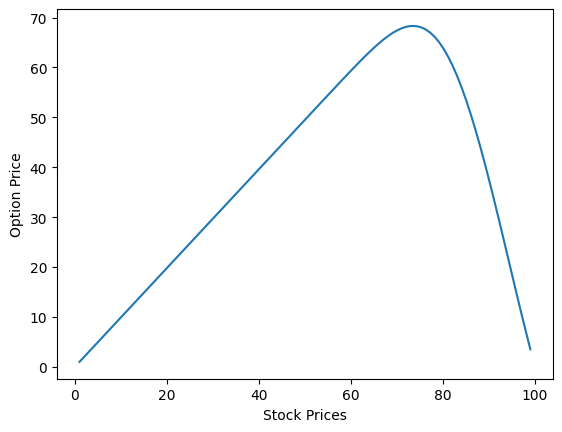

In [23]:
v = option.value(value_dt, stock_prices, discount_curve, dividend_curve, model)
plt.plot(stock_prices, v)
plt.xlabel("Stock Prices")
plt.ylabel("Option Price");

And we can do the same to the option delta.

## Risk Analysis

The analytical model produced the following sensitivities

In [24]:
option.delta(value_dt, stock_price, discount_curve, dividend_curve, model)

np.float64(-3.8695679507583236)

In [25]:
option.gamma(value_dt, stock_price, discount_curve, dividend_curve, model)

np.float64(0.02048636815743521)

In [26]:
option.theta(value_dt, stock_price, discount_curve, dividend_curve, model)

np.float64(27.58906804472126)

In [27]:
option.vega(value_dt, stock_price, discount_curve, dividend_curve, model)

np.float64(-0.7418670629173327)

In [28]:
option.rho(value_dt, stock_price, discount_curve, dividend_curve, model)

np.float64(-73.68237190821247)

Copyright (c) 2020 Dominic O'Kane